In [11]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load Data
df=pd.read_csv('C:/Users/Ismail/Downloads/sales_data_sample.csv',encoding='latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
print('Shape',df.shape)
print(df.info())

Shape (2823, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non

In [10]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
# Quick missing summary to understand data quality 
print(df.isna().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [16]:
# fill non-critical text fields with simple defaults to avoid null-related issues
for c in ['ADDRESSLINE2','STATE','TERRITORY','POSTALCODE']:
    if c in df.columns:
        df[c]=df[c].fillna('Unknown')

In [17]:
# Convert OrderDate to Datetime 
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

In [18]:
# Sanity checks after cleaning 
print('Missing After Cleaning:\n',df.isna().sum())

Missing After Cleaning:
 ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [19]:
# Create time features and basic commercial metrics to deepen analysis
df['OrderMonth']=df['ORDERDATE'].values.astype('datetime64[M]')
df['Year']=df['ORDERDATE'].dt.year
df['Month']=df['ORDERDATE'].dt.month
df['Quarter']=df['ORDERDATE'].dt.quarter
df['WeekDay']=df['ORDERDATE'].dt.day_name()

In [20]:
# Simple unit economics and discount proxy
df['LineRevenue']=df['SALES']
df['UnitRevenue']=df['PRICEEACH']
df['DiscountRate']=1-(df['PRICEEACH']/df['MSRP']).replace(0,np.nan)

In [22]:
# Order-Level Totals
orders_total=df.groupby('ORDERNUMBER').agg(
    OrderRevenue=('SALES','sum'),
    Items=('QUANTITYORDERED','sum'),
    Lines=('ORDERLINENUMBER','count'),
    FirstDate=('ORDERDATE','min')
).reset_index()

In [25]:
# AOV (Average Order Value)
AOV=orders_total['OrderRevenue'].mean()
print('AOV',round(AOV,2))

AOV 32679.57


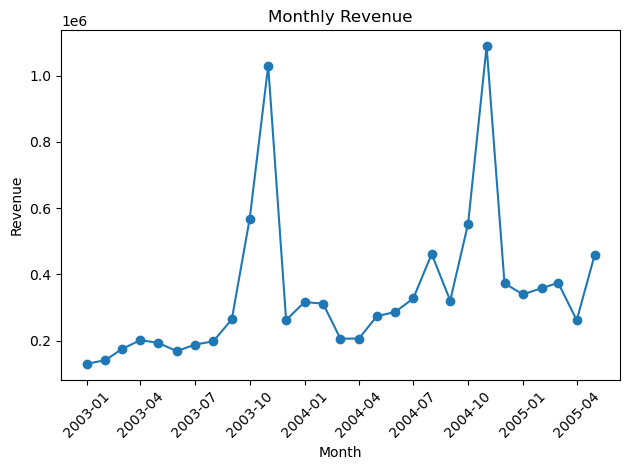

In [27]:
# Monthly Revenue trend to understand seasonality
monthly_rev=df.groupby('OrderMonth')['SALES'].sum()

plt.figure()
plt.plot(monthly_rev.index,monthly_rev.values,marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

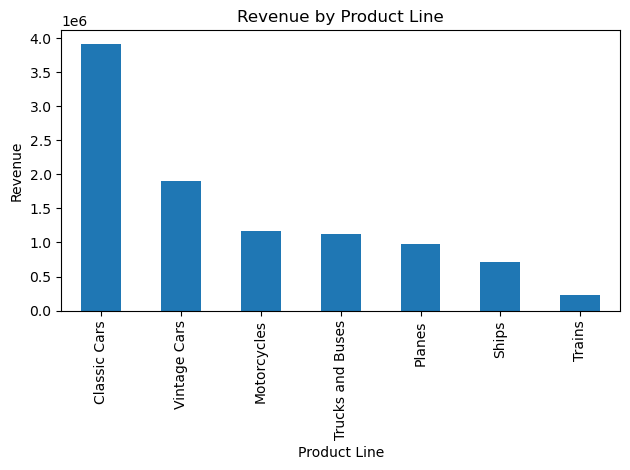

In [28]:
# Revenue by Product line for portfolio view
pl_rev=df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
plt.figure();pl_rev.plot(kind='bar')
plt.title('Revenue by Product Line');plt.ylabel('Revenue');plt.xlabel('Product Line')
plt.tight_layout();plt.show()

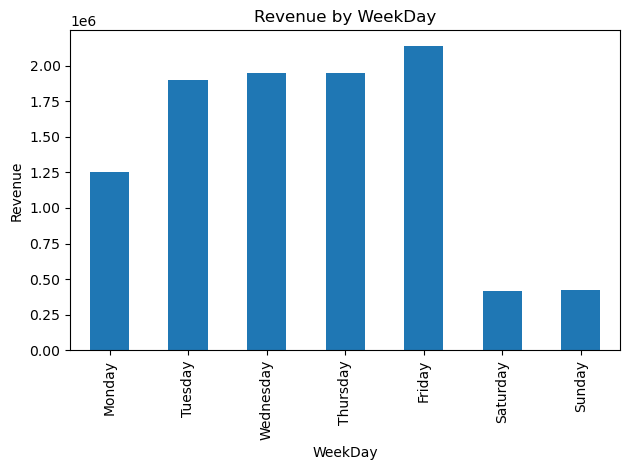

In [32]:
# WeekDay Revenue to plan staffing/ops
wd_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
wd_rev=df.groupby('WeekDay')['SALES'].sum().reindex(wd_order)
plt.figure();wd_rev.plot(kind='bar')
plt.title('Revenue by WeekDay');plt.ylabel('Revenue'),plt.xlabel('WeekDay')
plt.tight_layout()
plt.show()

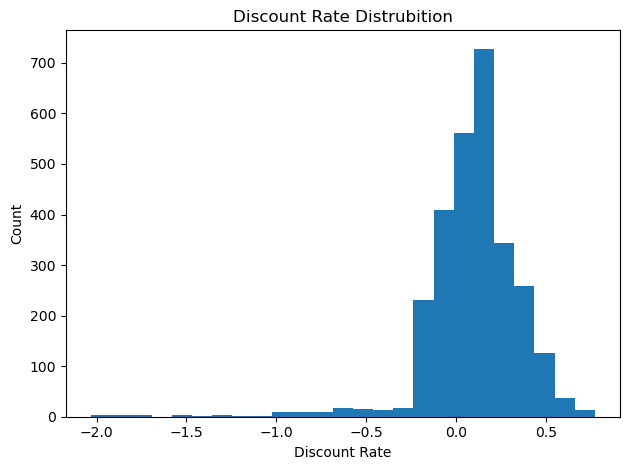

In [33]:
# Discount Distrubition to see how often and how deep discount occure
plt.figure();plt.hist(df['DiscountRate'].dropna(),bins=25)
plt.title('Discount Rate Distrubition');plt.xlabel('Discount Rate');plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [35]:
# Price-Quantity correlation per product line 
corrs=df.groupby('PRODUCTLINE').apply(
    lambda g: g['PRICEEACH'].corr(g['QUANTITYORDERED'])).sort_values()
print('Price-Qunatity Correlation by PRODUCTLINE (negative ~ higher price,lower qty :')
print(corrs)

Price-Qunatity Correlation by PRODUCTLINE (negative ~ higher price,lower qty :
PRODUCTLINE
Ships              -0.114090
Trains             -0.095888
Vintage Cars       -0.016920
Classic Cars       -0.000902
Planes              0.021754
Motorcycles         0.048126
Trucks and Buses    0.073602
dtype: float64


C:\Users\Ismail\AppData\Local\Temp\ipykernel_7772\3408165055.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs=df.groupby('PRODUCTLINE').apply(


STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


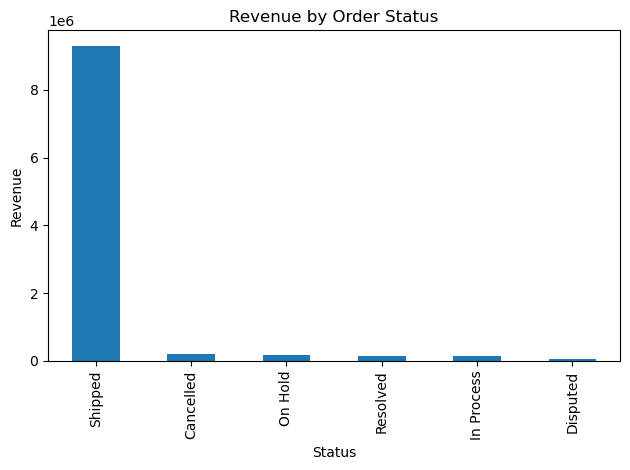

In [36]:
# Operational Status
print(df['STATUS'].value_counts())

status_rev=df.groupby('STATUS')['SALES'].sum().sort_values(ascending=False)
plt.figure();status_rev.plot(kind='bar');plt.title('Revenue by Order Status');plt.xlabel('Status');plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [38]:
# Compute Top Countries by Cancelation Rate
if 'Cancelled' in df['STATUS'].unique():
    cancel_rate = (df.assign(is_cancel=(df['STATUS']=='Cancelled').astype(int))
                     .groupby('COUNTRY')['is_cancel'].mean()
                     .sort_values(ascending=False).head(10))

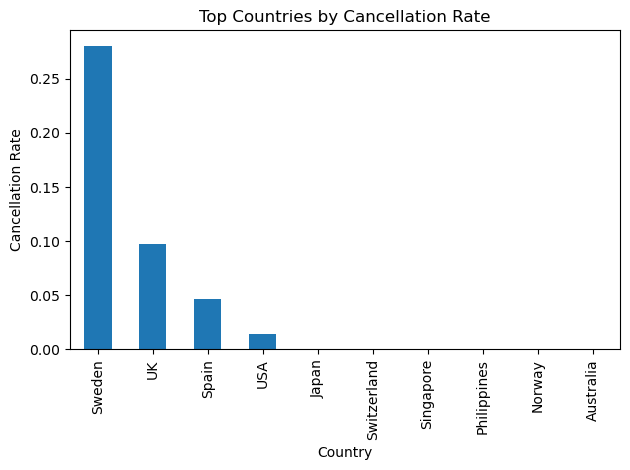

In [40]:
plt.figure();cancel_rate.plot(kind='bar');plt.title('Top Countries by Cancellation Rate');plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

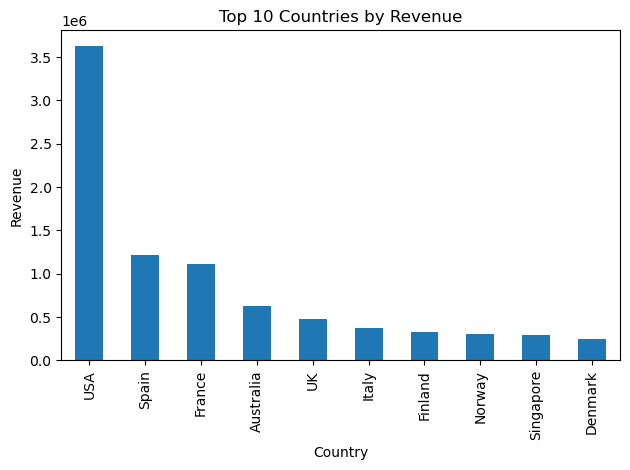

In [41]:
# Top 10 Countries by Revenue to guide territory planning
top_countries=df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure();top_countries.plot(kind='bar');plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country');plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [44]:
# Pareto curve (customers) - how concentrated review is 
cust_rev=df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False)
cum=cust_rev.cumsum()/cust_rev.sum()
x=np.arange(1, len(cust_rev)+1)/len(cust_rev)

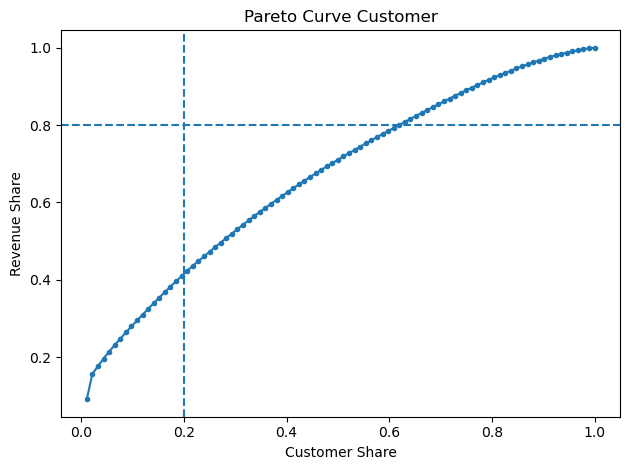

In [46]:
plt.figure()
plt.plot(x, cum, marker='.')
plt.axhline(0.8, ls='--')
plt.axvline(0.2, ls='--')
plt.title('Pareto Curve Customer')
plt.xlabel('Customer Share');plt.ylabel('Revenue Share')
plt.tight_layout()
plt.show()

In [48]:
approx_share = x[np.argmax(cum.values >= 0.8)]
print(f"~{approx_share*100:.1f}% of customers drive 80% of revenue (approx).")

~62.0% of customers drive 80% of revenue (approx).


In [49]:
# Pareto curve (Products)
prod_rev=df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False)
cum2=prod_rev.cumsum()/prod_rev.sum()
x2=np.arange(1, len(prod_rev)+1)/len(prod_rev)

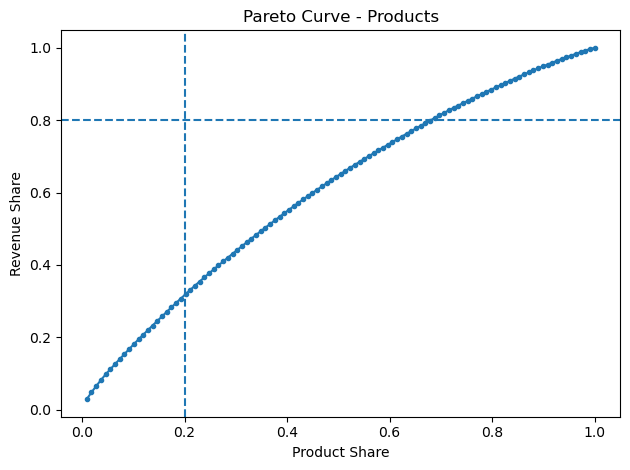

In [50]:
plt.figure()
plt.plot(x2, cum2,marker='.')
plt.axhline(0.8, ls='--');plt.axvline(0.2, ls='--')
plt.title('Pareto Curve - Products');plt.xlabel('Product Share');plt.ylabel('Revenue Share')
plt.tight_layout()
plt.show()

In [51]:
# RFM Segementaion - proioritize for retention/upsell 
snapshot = df['ORDERDATE'].max()+pd.Timedelta(days=1)
rfm=df.groupby('CUSTOMERNAME').agg(
    Recency=('ORDERDATE',lambda s: (snapshot - s.max()).days),
    Frequency=('ORDERNUMBER','unique'),
    Monetary=('SALES','sum')
).reset_index()

In [57]:
print(rfm[['Recency','Frequency','Monetary']].describe())
print(rfm[['Recency','Frequency','Monetary']].isna().sum())
print("Unique Recency values:", rfm['Recency'].nunique())


          Recency       Monetary
count   92.000000      92.000000
mean   182.826087  109050.313587
std    131.420524  110308.612808
min      1.000000    9129.350000
25%     81.250000   70129.432500
50%    186.000000   86522.610000
75%    230.250000  120575.875000
max    509.000000  912294.110000
Recency      0
Frequency    0
Monetary     0
dtype: int64
Unique Recency values: 79


In [66]:
# Calculate Frequency correctly — count unique orders per customer
rfm['Frequency'] = df.groupby('CUSTOMERNAME')['ORDERNUMBER'].nunique().reindex(rfm['CUSTOMERNAME']).values
print(rfm[['Frequency']].describe())
print("Unique Frequency:", rfm['Frequency'].nunique())

       Frequency
count  92.000000
mean    3.336957
std     2.924986
min     1.000000
25%     2.000000
50%     3.000000
75%     3.000000
max    26.000000
Unique Frequency: 7


In [75]:
# Quartile scoring. Higher is better overall
rfm['R_q'] = pd.qcut(rfm['Recency'], 4, duplicates='drop')
rfm['F_q'] = pd.qcut(rfm['Frequency'], 4, duplicates='drop')
rfm['M_q'] = pd.qcut(rfm['Monetary'], 4, duplicates='drop')

In [72]:
rfm['R_q'] = rfm['R_q'].cat.codes + 1
rfm['F_q'] = rfm['F_q'].cat.codes + 1
rfm['M_q'] = rfm['M_q'].cat.codes + 1
rfm['RFM_Score'] = rfm[['R_q','F_q','M_q']].sum(axis=1)

In [73]:
print(rfm[['CUSTOMERNAME','Recency','Frequency','Monetary','RFM_Score']].sort_values('RFM_Score', ascending=False).head(10))

                    CUSTOMERNAME  Recency  Frequency   Monetary  RFM_Score
71        Saveley & Henriot, Co.      456          3  142874.25         10
45             Land of Toys Inc.      198          4  164069.44         10
0                 AV Stores, Co.      196          3  157807.81          9
11            Baane Mini Imports      208          4  116599.19          9
31       Dragon Souveniers, Ltd.       91          5  172989.68          9
60  Online Diecast Creations Co.      209          3  131685.30          9
24    Corrida Auto Replicas, Ltd      212          3  120615.28          9
23      Corporate Gift Ideas Co.       98          4  149882.50          9
40                  Herkku Gifts      271          3  111640.28          9
79          Technics Stores Inc.      147          4  120783.07          9


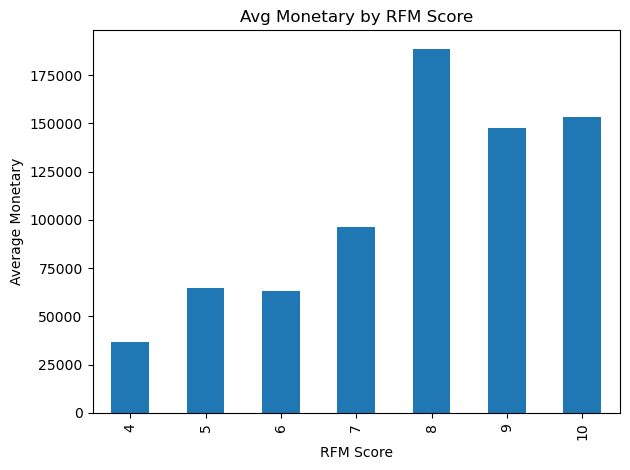

In [74]:
# Visualize monetary by RFM score.
plt.figure()
rfm.groupby('RFM_Score')['Monetary'].mean().plot(kind='bar')
plt.title('Avg Monetary by RFM Score'); plt.xlabel('RFM Score'); plt.ylabel('Average Monetary')
plt.tight_layout(); plt.show()

In [78]:
# Executive summary helpers (top customers/products and MoM growth).
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
top_products  = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)

m = monthly_rev.reset_index()
m['MoM_%'] = m['SALES'].pct_change()*100

print("Top 10 Customers by Revenue:\n", top_customers)
print("\nTop 10 Products by Revenue:\n", top_products)
print("\nMonthly Revenue + MoM (%):\n", m.tail(12))

Top 10 Customers by Revenue:
 CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64

Top 10 Products by Revenue:
 PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S24_3856    140626.90
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
Name: SALES, dtype: float64

Monthly Revenue + MoM (%):
    OrderMonth       SALES      MoM_%
17 2004-06-01   286674.22   4.840516
18 2004-07-01   327144.09  14.117025
19 2004-08-01   461501.27  41.069726
20 2004-09-01   320750.91 -30.498369
21 20